<a href="https://colab.research.google.com/github/rama96/digits_classifier/blob/master/digits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.9MB/s 
     |████████████████████████████████| 1.2MB 29.4MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 194kB 55.7MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *



In [4]:
path = untar_data(URLs.MNIST)

In [5]:
#hide
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [7]:
!ls

gdrive	sample_data


In [8]:
ones = (path/'training'/'1').ls().sorted()


In [9]:
im1_path = ones[0]
im1 = Image.open(im1_path)
im1

In [10]:
file_path = (path/'training')
files = get_image_files(file_path)

In [11]:
files

(#60000) [Path('training/1/17942.png'),Path('training/1/35661.png'),Path('training/1/31911.png'),Path('training/1/57855.png'),Path('training/1/22489.png'),Path('training/1/14038.png'),Path('training/1/7084.png'),Path('training/1/34168.png'),Path('training/1/5834.png'),Path('training/1/45537.png')...]

In [12]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

In [13]:
dls = db.dataloaders(file_path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() 

''

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [15]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

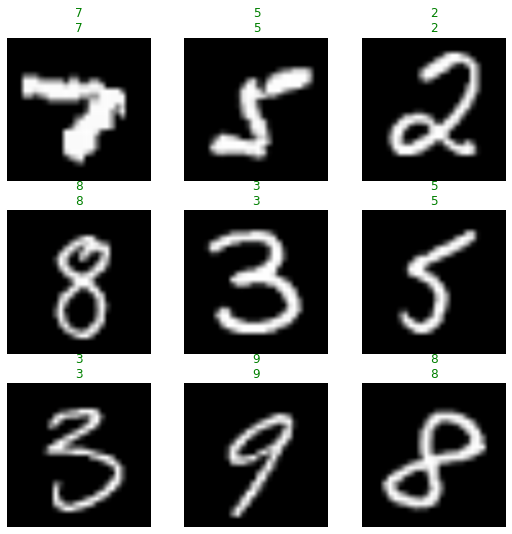

In [34]:
learn.show_results()

In [35]:
interp = Interpretation.from_learner(learn)

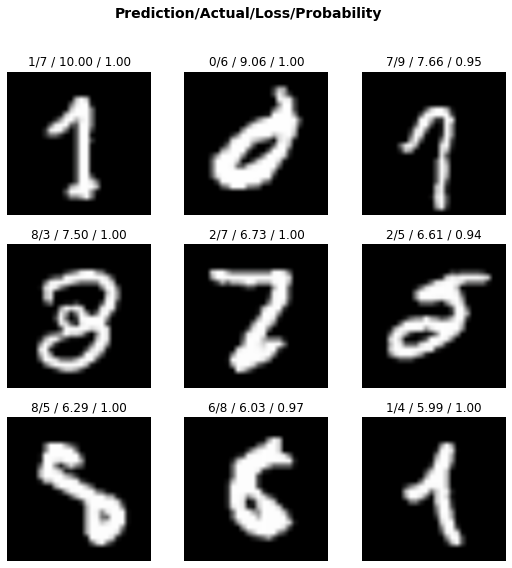

In [36]:
interp.plot_top_losses(9)


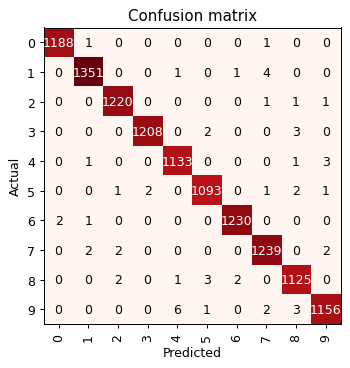

In [40]:
interp = ClassificationInterpretation.from_learner(learn)


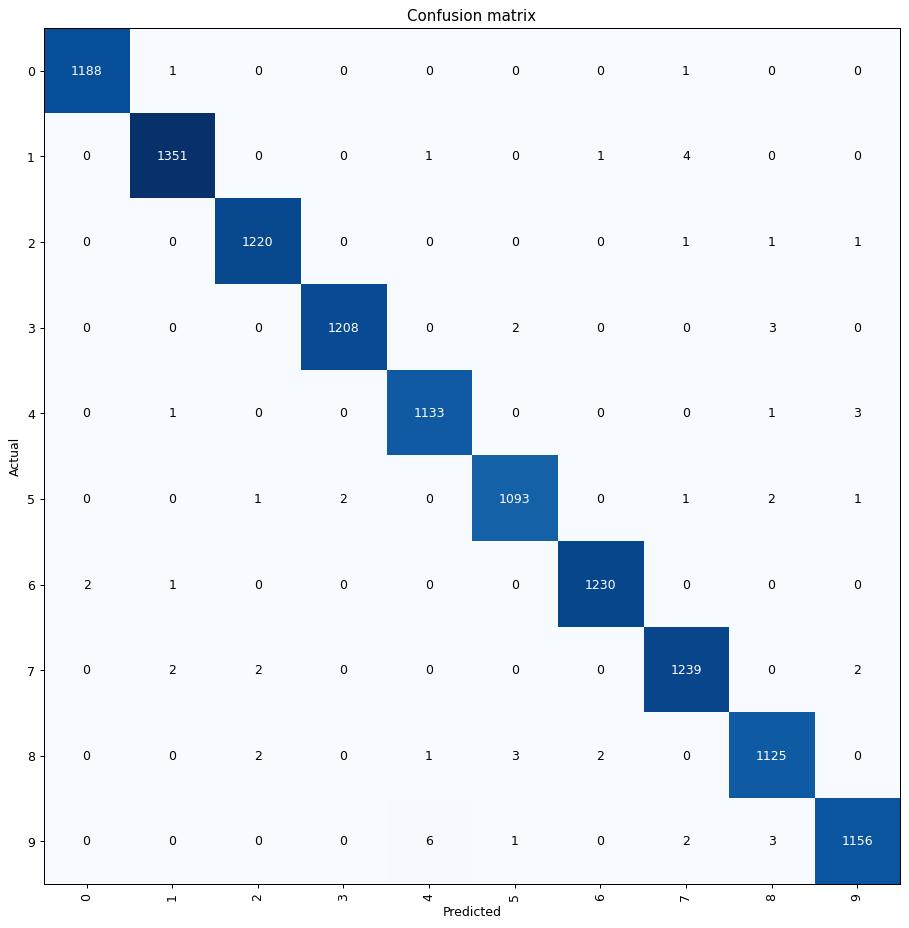

In [43]:
interp.plot_confusion_matrix(figsize=(10,15),cmap='Blues',dpi = 90)

In [1]:
interp

NameError: ignored